In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn import preprocessing
import scipy

In [2]:
def rem_cat(df):
    df['C_ 1'].replace(['I','H','K','G','J'],[0,1,2,3,4],inplace=True)
    df['C_ 2'].replace(['I','H','K','G','J'],[0,1,2,3,4],inplace=True)
    df['C_ 3'].replace(['I','H','K','G','J'],[0,1,2,3,4],inplace=True)
    df['C_ 4'].replace(['I','H','K','G','J'],[0,1,2,3,4],inplace=True)
    df['C_ 5'].replace(['I','H','K','G','J'],[0,1,2,3,4],inplace=True)

In [33]:
df = pd.read_csv(r"case1Data.txt", sep=', ', engine='python')
y = df.y
rem_cat(df)
X_num = df.iloc[:, 1:]
df_Xn = pd.read_csv(r"case1Data_Xnew.txt",  sep=', ', engine='python')
rem_cat(df_Xn)

In [34]:
df_Xn.iloc[:,95]

0      3.0
1      0.0
2      NaN
3      3.0
4      1.0
      ... 
995    NaN
996    4.0
997    1.0
998    1.0
999    4.0
Name: C_ 1, Length: 1000, dtype: float64

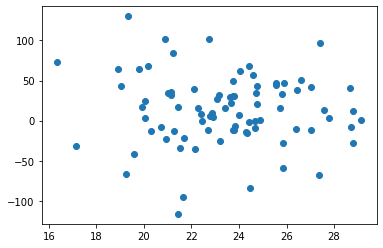

In [47]:
data = X_num.iloc[:,5]
plt.scatter(data,y)
plt.show()

In [47]:
def my_metric(X, Y,**kwds):
    ans = 0
    n = len(X)
    if len(Y)!= n:
        raise Exception("X and Y don't have same length")
    if n != 100:
        raise Exception(f"Length of vectors is not 100, it is {n}")
    for i in range(96):
        if np.isnan(X[i]) or np.isnan(Y[i]):
            pass
        else:
            ans += (X[i]-Y[i])**2
    for i in range(95,100):
        if np.isnan(X[i]) or np.isnan(Y[i]):
            pass
        elif X[i] != Y[i]:
            ans += 1.0
    return np.sqrt(ans)

In [48]:
imputer = KNNImputer(n_neighbors = 10, metric = my_metric)
X_num = imputer.fit_transform(X_num)

In [49]:
X_num[96,:]

array([-4.31154000e+00,  7.20811500e+00,  1.48750919e+01, -1.72324570e+01,
       -1.11734260e+01,  2.46602760e+01,  6.10839070e+00,  8.51315200e+00,
        4.32702000e+00,  1.55696000e+00,  2.10790260e+01, -9.88014000e-01,
        8.89966100e+00,  2.52273100e+00, -1.21090200e+00,  2.02914950e+01,
       -1.97690900e+00,  2.29047490e+01, -1.38250500e+00, -2.34666800e+01,
       -4.20175920e+01,  1.41984970e+01, -5.04103100e+00,  4.52340100e+00,
       -2.86061600e+00,  6.80384600e+00, -1.03693700e+00,  1.49984800e+00,
        1.48298500e+00, -5.46241600e+00, -5.65251600e+00, -4.55045100e+00,
       -1.44987420e+01, -1.67593640e+01,  3.11788300e+00, -2.71952000e-01,
       -2.41733000e-02,  3.27948800e+00,  1.28375170e+01,  1.83828700e+00,
        1.41168580e+01,  1.16052520e+01,  2.29228080e+01, -1.46160930e+01,
        2.61527700e+00, -4.82447700e+00,  6.95799900e+00, -6.21351700e+00,
        1.59346020e+01,  2.28774375e+01, -7.85338700e+00,  2.55985850e+00,
       -5.07288300e+00,  

In [41]:
for i in range(95,100):
    for j in range(100):
        print(X_num[i,j], np.around(X_num[i,j]))
        X_num[i,j] = np.around(X_num[i,j])

-4.0 -4.0
7.0 7.0
15.0 15.0
-17.0 -17.0
-15.0 -15.0
26.0 26.0
4.0 4.0
6.0 6.0
3.0 3.0
-4.0 -4.0
16.0 16.0
-0.0 -0.0
6.0 6.0
1.0 1.0
-7.0 -7.0
13.0 13.0
-3.0 -3.0
20.0 20.0
-2.0 -2.0
-24.0 -24.0
-46.0 -46.0
14.0 14.0
-7.0 -7.0
3.0 3.0
-5.0 -5.0
5.0 5.0
-3.0 -3.0
1.0 1.0
-0.0 -0.0
-7.0 -7.0
-8.0 -8.0
-7.0 -7.0
-15.0 -15.0
-18.0 -18.0
2.0 2.0
-6.0 -6.0
-1.0 -1.0
3.0 3.0
7.0 7.0
-4.0 -4.0
12.0 12.0
8.0 8.0
20.0 20.0
-20.0 -20.0
-5.0 -5.0
-4.0 -4.0
5.0 5.0
-8.0 -8.0
14.0 14.0
20.0 20.0
-12.0 -12.0
2.0 2.0
-9.0 -9.0
11.0 11.0
22.0 22.0
10.0 10.0
-13.0 -13.0
1.0 1.0
-8.0 -8.0
0.0 0.0
-4.0 -4.0
-14.0 -14.0
14.0 14.0
-3.0 -3.0
-22.0 -22.0
-3.0 -3.0
-20.0 -20.0
17.0 17.0
4.0 4.0
8.0 8.0
4.0 4.0
6.0 6.0
-9.0 -9.0
-4.0 -4.0
-3.0 -3.0
25.0 25.0
-5.0 -5.0
5.0 5.0
-1.0 -1.0
-0.0 -0.0
7.0 7.0
-18.0 -18.0
-4.0 -4.0
16.0 16.0
-11.0 -11.0
-2.0 -2.0
3.0 3.0
7.0 7.0
-32.0 -32.0
-1.0 -1.0
9.0 9.0
17.0 17.0
-6.0 -6.0
4.0 4.0
1.0 1.0
1.0 1.0
0.0 0.0
3.0 3.0
2.0 2.0
1.0 1.0
-4.0 -4.0
7.0 7.0
15.0 15.0
-17.0 -1

In [39]:
X_num[:,95:]

TypeError: '(slice(None, None, None), slice(95, None, None))' is an invalid key

In [5]:
# Standarization of the dataset
sc = StandardScaler()
X_stdz = sc.fit_transform(X_num)
df_stdz = pd.DataFrame(data = X_stdz)
X = X_stdz[:, 1:]
df_temp = pd.DataFrame(X_stdz)